In [16]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
obspath = '/Users/jonniebarnsley/Downloads/antarctica_bedmachine_inverse_1km.nc'
file = xr.open_dataset(obspath)
file

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
Data variables:
    crs      int32 ...
    umod     (y, x) float64 ...
    umodc    (y, x) float64 ...
    btrc     (y, x) float64 ...
    velx     (y, x) float64 ...
    vely     (y, x) float64 ...
Attributes: (12/14)
    Conventions:         CF-1.7
    component_0:         umod
    component_1:         umodc
    component_2:         btrc
    component_3:         velx
    component_4:         vely
    ...                  ...
    num_components:      5
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  slc removed this feature to see if it was causing chaos

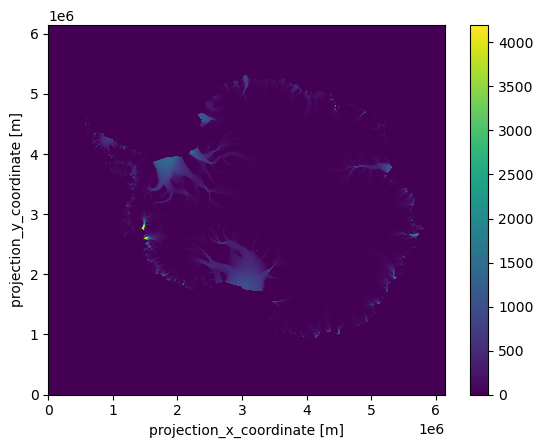

In [5]:
u = file.velx
v = file.vely
obs = np.sqrt(u**2 + v**2)
obs.plot()

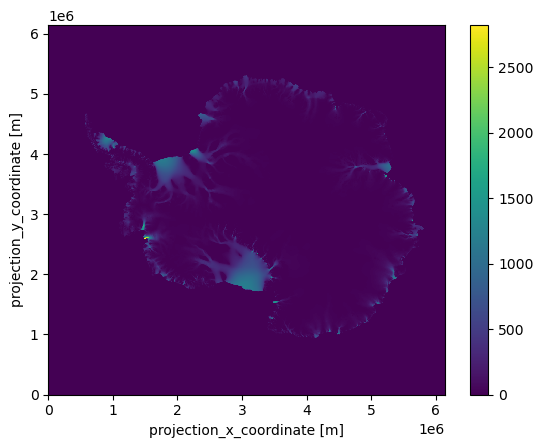

In [ ]:
startpath = '/Users/jonniebarnsley/Downloads/start0.nc'
file = xr.open_dataset(startpath)

u = file.xVels
v = file.yVels
start = np.sqrt(u**2 + v**2)
start.plot()

In [12]:
obs = obs.interp(coords=start.coords)
obs

<xarray.DataArray (y: 768, x: 768)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * x        (x) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06
  * y        (y) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06

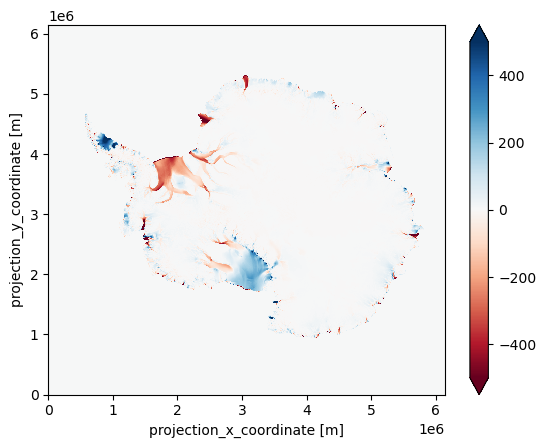

In [31]:
init_diff = start-obs
init_diff.plot(
    #norm=mcolors.SymLogNorm(10),
    vmin=-500,
    vmax=500,
    cmap='RdBu'
    )

In [25]:
endpath = '/Users/jonniebarnsley/Downloads/end.nc'
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/end.nc')
u = file.xVels
v = file.yVels
end = np.sqrt(u**2+v**2)

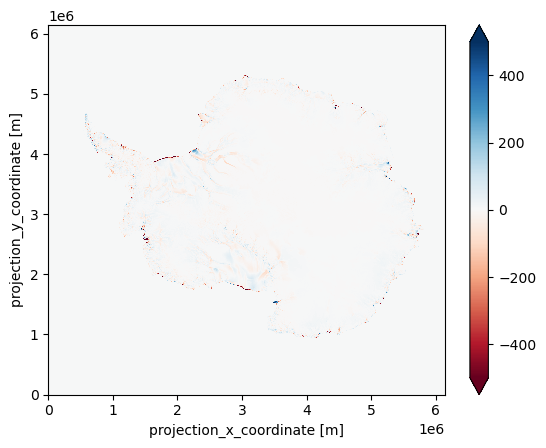

In [33]:
final_diff = end-obs
final_diff.plot(
    #norm=mcolors.SymLogNorm(10),
    vmax=500,
    vmin=-500,
    cmap='RdBu'
    )

Text(0.5, 1.0, 'iteration 70')

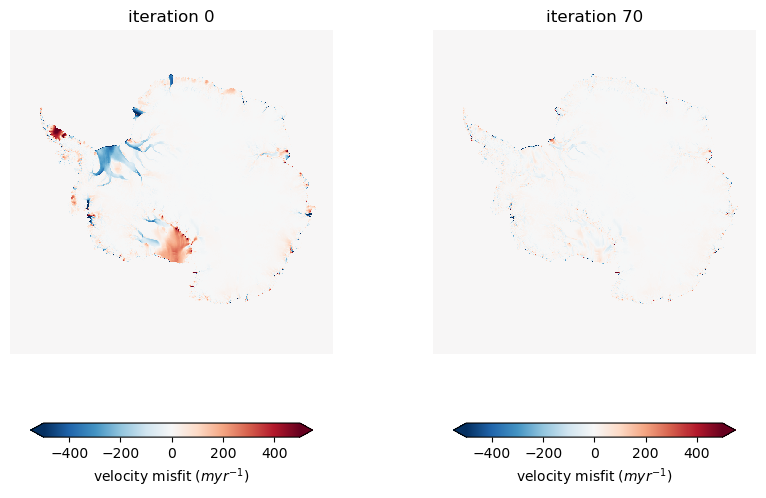

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

kw = {'label': "velocity misfit ($m yr^{-1}$)", 'shrink': 0.8, 'orientation': 'horizontal'}

init_diff.plot(ax=axes[0], vmax=500, vmin=-500, cmap='RdBu_r', cbar_kwargs=kw)
final_diff.plot(ax=axes[1], vmax=500, vmin=-500, cmap='RdBu_r', cbar_kwargs=kw)

for ax in axes:
    ax.set_axis_off()
    ax.set_aspect('equal')

axes[0].set_title('iteration 0')
axes[1].set_title('iteration 70')

In [1]:
floor(3.2)

NameError: name 'floor' is not defined